In [1]:
import pandas as pd
import sys
sys.path.append("../src/")
import utils as ut
import fBm_stats as fbs
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
from scipy import fftpack
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')
plt.style.use("plot_style.mplstyle")

In [2]:
data_path = "../_raw/"
h = 0.05
T = 100
n = int(T/h)
t = np.arange(0, T, h)

In [3]:
def get_msd(A, eta, C, theta_12, theta_H, H, avg = 12000, h = 0.05, task_set = ["001"]):
    for i, tk in enumerate(task_set):
        f = f"trj-set{tk}-avg{avg}-dt{h}-T{T}-A{A}-eta{eta}-C{C}-t12_{theta_12}-tH{theta_H}-H{H}"
        if i == 0:
            df_trj = ut.read_hdf5_data(data_path + f + ".hdf5")
            df_trj = df_trj.set_index("t")
        else:
            df_temp = ut.read_hdf5_data(data_path + f + ".hdf5")
            df_temp = df_temp.set_index("t")
            df_trj = pd.concat([df_trj, df_temp], axis = 1)
    msd = fbs.msd(df_trj, False).reset_index()
    msd.columns = ["t", "msd"]
    return msd

In [4]:
def plot_msd(ax, df_msd, H, color, log = False, beta = False):
    if beta:
        beta = 2 - 2*H
        label = r"$\beta$"+ f" = {round(beta,2)}"
    else:
        label = f"H = {round(H,2)}"
        
    df_msd.set_index("t").msd.plot(ax = ax, label = label, ls = "-", color = color)
    ax.legend()
    if log:
        ax.set_xscale("log")
        ax.set_yscale("log")
    ax.set_ylabel("MSD")
    ax.set_xlabel("t")

In [5]:
def add_trend(ax, x0, xf, func, text, xtext = False, dx = 0, dy = 0, **kwargs):
    t = np.arange(x0,xf,0.01)
    if xtext:
        xloc = xtext
    else:
        xloc = xf
    if kwargs:
        ax.plot(t,func(t, H = kwargs["H"]), color = "black", alpha = 0.5, ls = ":")
        ax.text(xloc + dx, func(xloc, H = kwargs["H"]) + dy, text)
    else:
        ax.plot(t, func(t), color = "black", alpha = 0.5, ls = ":")
        ax.text(xloc + dx, func(xloc) + dy, text)

def t(t):
    return t

def t2(t):
    return t**2

def t3(t):
    return t**3   

def constant(t):
    return 10 -t+t

def t2_2H(t, **kwargs):
    H = kwargs["H"]
    return t**(2-2*H) 

In [6]:
def add_caption_letter(ax, cap):
    #ax.text(0.1*ax.get_xlim()[1], 0.9*ax.get_ylim()[1], cap)
    ax.text(.02, .98, cap, ha='left', va='top', transform=ax.transAxes)

In [7]:
def add_freq_grid(ax, freq, T):
    t = 1/freq
    while t <= T:
        ax.axvline(x = t, color = "black", alpha = 0.5, ls = ":")
        t += 1/freq
        
    def numfmt(x, pos): # your custom formatter function: divide by 100.0
        s = '{} $\pi$'.format(int(x / np.pi))
        return s

    yfmt = tck.FuncFormatter(numfmt)
    ax.xaxis.set_major_formatter(yfmt)
    ax.xaxis.set_major_locator(tck.MultipleLocator(base = 8*np.pi))
        

In [8]:
from met_brewer import met_brew
colors1 = met_brew(name = "Archambault", n = 6, brew_type = "continuous")
colors2 = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

## FLUCTUATION-DISSIPATION PRESERVED

$  A \frac{dq^2}{dt^2} + \eta \space {}^{C}_{O}D^{\beta}_{t}q(t) = \theta_H \xi_H $

Lutz: $C = 0$, $\theta_{1/2} = 0$

* Oscilations: $\beta \in [0, 0.1]$
* Hurst: $H \in [0.95, 1)$

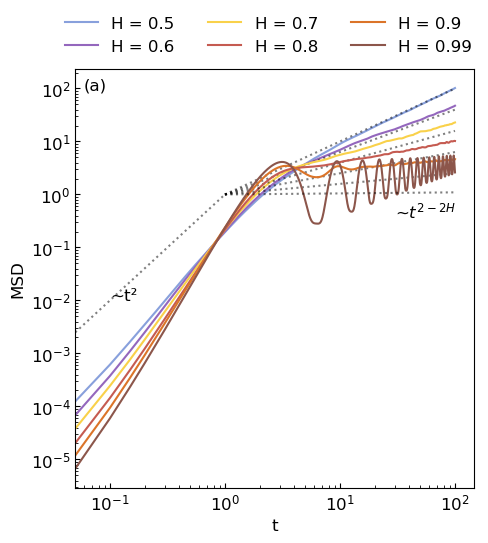

In [9]:
plt.style.use("plot_style.mplstyle")
avg = 4000

task_set = ["001"] 
A = 1.0
eta = 1.0
C = 0.0
theta_H = 1.0
theta_12 = 0.0
x0i = 1
fig, ax = plt.subplots(1,1, figsize = (5,5))

#TREND

H = 0.50001
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax, df_msd, H, color = colors1[0])
add_trend(ax, x0 = x0i, xf = 100, func = t2_2H, text = r"", xtext = 0.1, H = H)

H = 0.6
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax, df_msd, H, color = colors2[4])
add_trend(ax, x0 = x0i, xf = 100, func = t2_2H, text = r"", xtext = 0.1, H = H)

H = 0.7
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax, df_msd, H, color = colors1[5])
add_trend(ax, x0 = x0i, xf = 100, func = t2_2H, text = r"", xtext = 0.1, H = H)

H = 0.8
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax, df_msd, H, color = colors1[3])
add_trend(ax, x0 = x0i, xf = 100, func = t2_2H, text = r"", xtext = 0.1, H = H)

H = 0.9
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax, df_msd, H, color = colors1[4])
add_trend(ax, x0 = x0i, xf = 100, func = t2_2H, text = r"", xtext = 0.1, H = H)

H = 0.99
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax, df_msd, H, color = colors2[5])
add_trend(ax, x0 = 1, xf = 100, func = t2_2H, text = r"~$t^{2-2H}$", xtext = 30, dy = -0.7, H = H)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(xmin = h)
ax.legend()

add_trend(ax, x0 = h, xf = 1, func = t2, text = "~t²", xtext = 0.1)
add_caption_letter(ax, "(a)")
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
fig.legend(handles, labels, bbox_to_anchor = (0.99, 1.1), ncol = 3)

fig.savefig("../outs/msd-lutz.png", dpi = 1000)


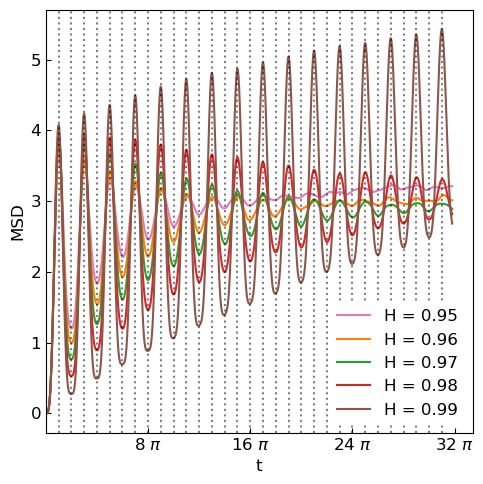

In [10]:
#OSCILATIONS
avg = 12000
task_set = ["001", "002"] 
A = 1.0
eta = 1.0
C = 0.0
theta_H = 1.0
theta_12 = 0.0
fig, ax = plt.subplots(1,1, figsize = (5,5))

H = 0.95
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax, df_msd, H, color = colors2[6])

H = 0.96
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax, df_msd, H, color = colors2[1])

H = 0.97
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax, df_msd, H, color = colors2[2])

H = 0.98
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax, df_msd, H, color = colors2[3])

H = 0.99
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax, df_msd, H, color = colors2[5])

add_freq_grid(ax, 1/np.pi, T)

ax.legend(loc = "lower right" , framealpha=1)

ax.set_xlim(xmin = h)
fig.savefig("../outs/oscilations-lutz.png", dpi = 1000)

## TIME GLASS

$  A \frac{dq^2}{dt^2} + \eta \space {}^{C}_{O}D^{\beta}_{t}q(t) =  \theta_{1/2}\xi_{1/2}$

Time glass: $C = 0$, $\theta_H = 0$

* Order of the dervative: $\beta \in [0.05, 0.1]$. 
* Hurst: $\beta = 2 - 2H$, $H \in [0.95, 0.975]$

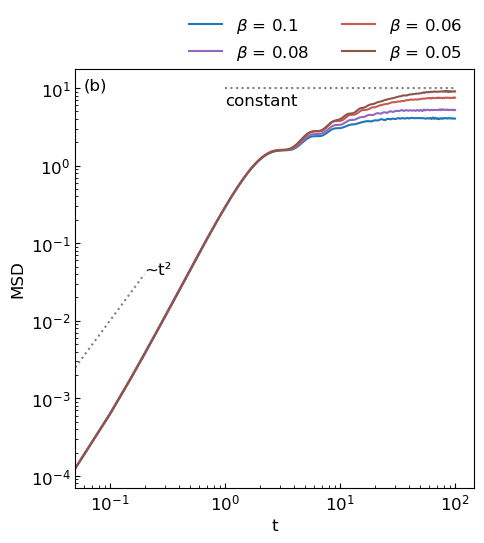

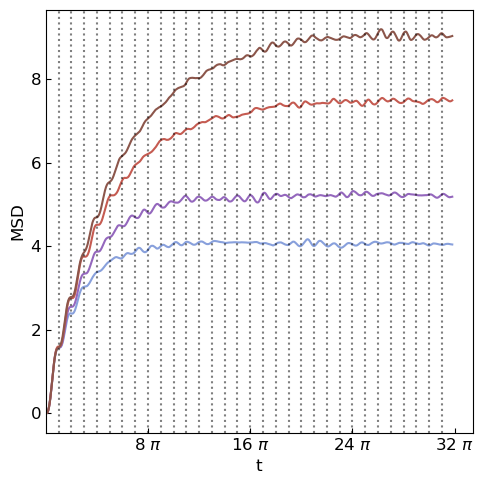

In [11]:
A = 1.0
eta = 1.0
C = 0.0
theta_H = 0.0
theta_12 = 1.0

task_set = ["001", "002"]

fig0, ax0 = plt.subplots(1,1, figsize = (5,5))

fig1, ax1 = plt.subplots(1,1, figsize = (5,5))

H = 0.95
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax0, df_msd, H, log = True, beta = True, color = colors2[0])
plot_msd(ax1, df_msd, H, beta = True, color = colors1[0])


H = 0.96
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax0, df_msd, H, log = True, beta = True, color = colors2[4])
plot_msd(ax1, df_msd, H, beta = True, color = colors2[4])

H = 0.97
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax0, df_msd, H, log = True, beta = True, color = colors1[3])
plot_msd(ax1, df_msd, H, beta = True, color = colors1[3])

H = 0.974
df_msd = get_msd(A, eta, C, theta_12, theta_H, H, avg, h, task_set)
plot_msd(ax0, df_msd, H, log = True, beta = True, color = colors2[5])
plot_msd(ax1, df_msd, H, beta = True, color = colors2[5])

add_trend(ax0, x0 = h, xf = 0.2, func = t2, text = "~t²", xtext = 0.2)
add_trend(ax0, x0 = 1, xf = 100, func = constant, text = "constant", xtext = 1, dy = -4)

add_freq_grid(ax1, 1/np.pi, T)

ax0.set_xlim(xmin = h)
ax1.set_xlim(xmin = h)

add_caption_letter(ax0, "(b)")
handles, labels = ax0.get_legend_handles_labels()
ax0.get_legend().remove()
ax1.get_legend().remove()
fig0.legend(handles, labels, bbox_to_anchor = (0.97, 1.1), ncol = 2)


fig0.savefig("../outs/msd-time-glass.png", dpi = 1000)
fig1.savefig("../outs/oscilations-time-glass.png", dpi = 1000)